### Задание:Необходимо запустить практическую часть занятия, и посмотреть самому то, о чём говорили на лекции. По образу практики, попробуйте создать искусственный датасет с лишними столбцами. Целевую метку, при правильной обработке данных, формируйте таким образом, чтобы без затруднений её смогла описать линейная модель. Ориентируйтесь на то, что было показано во время занятия, и каждый шаг описывайте в markdown. Здесь важно видеть ваш ход мысли. Не бойтесь ошибиться или написать не то. Данное задание не имеет какого-то “правильного” решения. Цель - достичь базового понимания проблемы. Чем больше вы фантазируете, тем лучше :) Тем не менее, старайтесь представить те ситуации, которые по-вашему мнению могли бы быть в реальных данных. ###

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression

#### Создаём сэмпл (вес, длина, ширина и высота коробки (продажа шкафов) в сантиметрах и стоимость ее транспортировки в рублях) ####

In [16]:
n_samples = 1000

weight = np.random.choice(20, n_samples) + 15
length = np.random.choice(40, n_samples) + 15
width = np.random.choice(60, n_samples) + 15
height = np.random.choice(180, n_samples) + 30

price = length * width * height // 100 + 100

data = pd.DataFrame({'weight': weight, 'length': length, 'width': width, 'height': height, 'price': price})
data.head()

,weight,length,width,height,price
0,21,51,60,128,4016
1,31,38,17,146,1043
2,26,46,50,200,4700
3,21,39,46,150,2791
4,17,22,23,44,322


#### Посмотрим на зависимость переменных ####

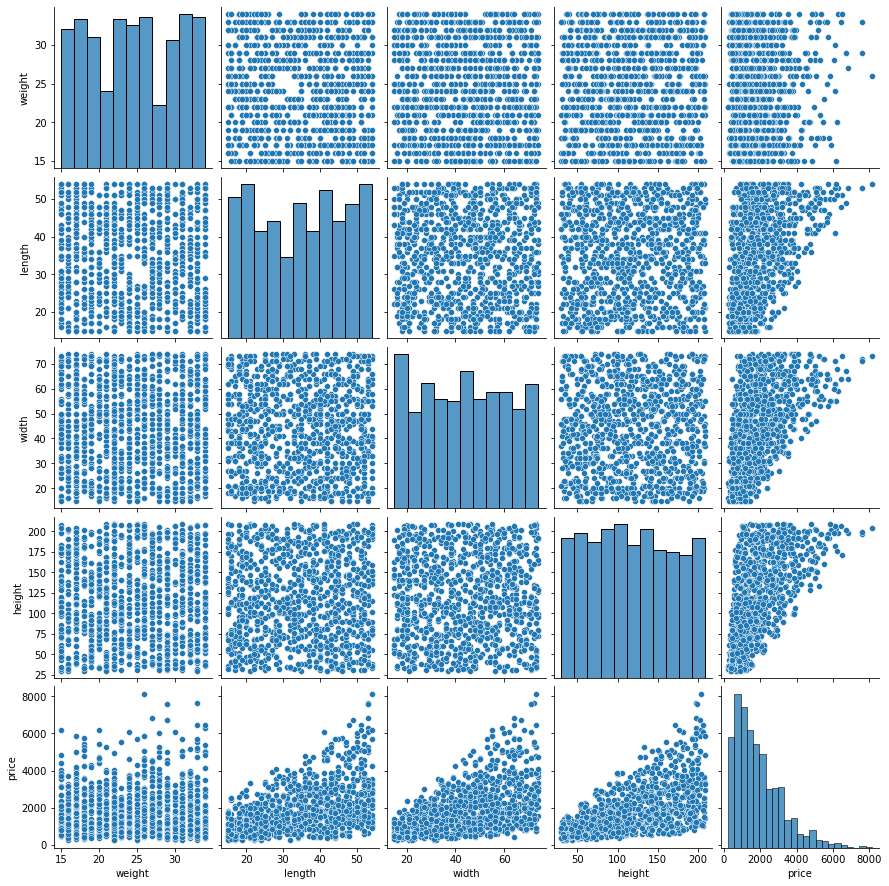

In [17]:
sns.pairplot(data)

#### Построим линейную регрессию на всех параметрах ####

In [18]:
from sklearn.metrics import mean_absolute_error

X = data[['weight', 'length', 'width', 'height']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['weight', 'length', 'width', 'height']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

y.median()

Weights: [ 7.67245406 51.07914495 40.21933079 15.21001609]
Bias: -3621.8239668827728
Error: 356.1239898279203


1573.0

### Ошибка довольно большая: 356, при средней стоимости 1573 ###

#### Попробуем не принимать в рассчет вес коробки ####

In [19]:
X = data[['length', 'width', 'height']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['length', 'width', 'height']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [51.03758941 40.13976781 15.23014904]
Bias: -3431.1706675876785
Error: 356.91670478382645


#### Параметры не улучшились. Возможно стоимость зависит не от линейных размеров, а от объема коробки. Создадим новый признак (объем коробки). ####

In [20]:
data['volume'] = data['length'] * data['width'] * data['height']
data.head()

,weight,length,width,height,price,volume
0,21,51,60,128,4016,391680
1,31,38,17,146,1043,94316
2,26,46,50,200,4700,460000
3,21,39,46,150,2791,269100
4,17,22,23,44,322,22264


#### Посмотрим на зависимость переменных ####

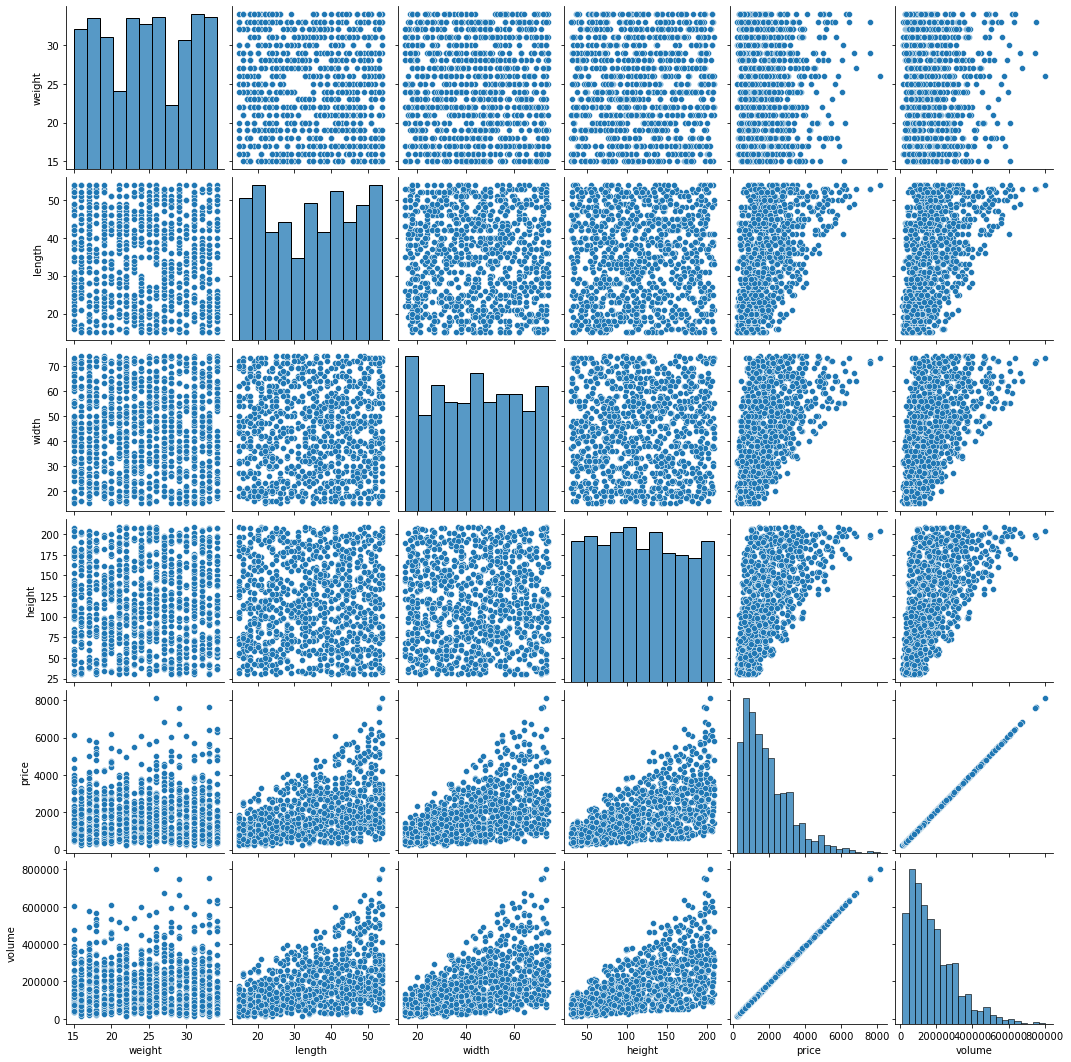

In [21]:
sns.pairplot(data)

#### Видим абсолютную линейную зависимость стоимости транспортировки от нового параметра объема коробки. Построим линейную регрессию на одном этом параметре. ####

In [22]:
X = data[['volume']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['volume']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [0.01000006]
Bias: 99.53676315709572
Error: 0.2582039153805467


### Параметры намного лучше, ошибка небольшая ###